# Introduction to time series
## What is time?

One definition of time as we percieve it is the observations of **events** as features of those events change. Think of a movie reel and how for evey frame a diffrecnt set of actions occur. These 'actions' can be quantified as features in any dataset based on the time in which they occur. What time series really seeks to point out is **what events occured at this point in time"**. This is incredibly powerful as time series is the backbone of nearly every industry. Here are some examples in which time series can be used:
> - Looking at your github data to see which days you do what type of programming, for how long, ect
> - In Fintech it's uses can be seen in studying past trends in crypto currency
> - In the banking industry for fraud dectection and stocks and bonds trading
> - In scientific analysis to study the effects of inputs in experiements over time
> - Many more...

## Discussion:
### Discuss how you conceptualize time asn well as give three examples of when measuring time in your everyday life could be interesting

## Using Quandl for Time Series analysis

The libray that we will use for retreiving financial, economic and sociology data is the python api for Quandl.

Head over to https://www.quandl.com/ to  sign up for an account to get an API key first!

Install this via anaconda with the following command. conda install -c anaconda quandl (you may have to use sudo)

For today well be taking a look at Tesla's Stock data!

In [39]:
# quandl for financial data
import quandl

import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt

# Use your API Key

quandl.ApiConfig.api_key = 'h5HpmRwoH4sHp6DEJQCJ'


# Retrieve TSLA data from Quandl
tesla = quandl.get('WIKI/TSLA')



### Lets take a look at the head of our dataframe to view what kind of data we will be working with.

In [40]:
tesla.tail(5)

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2018-03-21,310.25,322.44,310.19,316.53,5927881.0,0.0,1.0,310.25,322.44,310.19,316.53,5927881.0
2018-03-22,313.89,318.82,308.18,309.10,4914307.0,0.0,1.0,313.89,318.82,308.18,309.10,4914307.0
2018-03-23,311.25,311.61,300.45,301.54,6600538.0,0.0,1.0,311.25,311.61,300.45,301.54,6600538.0
2018-03-26,307.34,307.59,291.36,304.18,8324639.0,0.0,1.0,307.34,307.59,291.36,304.18,8324639.0
2018-03-27,304.00,304.27,277.18,279.18,13696168.0,0.0,1.0,304.00,304.27,277.18,279.18,13696168.0


## Time series organization

One of the first things you likely noticed is that instead of having the index just being a count, the index in this case is the actual timestamp. In certain fields or sciences, this may be the more prevalent form of working with times series. Other forms of time series may contain the temporal features as a regular column in your data.

In [41]:
tesla.describe()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
count,1949.000000,1949.000000,1949.000000,1949.000000,1.949000e+03,1949.0,1949.0,1949.000000,1949.000000,1949.000000,1949.000000,1.949000e+03
mean,158.686482,161.315984,155.863583,158.641133,4.548989e+06,0.0,1.0,158.686482,161.315984,155.863583,158.641133,4.548989e+06
std,111.101793,112.587258,109.427114,111.041316,4.185588e+06,0.0,0.0,111.101793,112.587258,109.427114,111.041316,4.185588e+06
min,16.140000,16.630000,14.980000,15.800000,1.185000e+05,0.0,1.0,16.140000,16.630000,14.980000,15.800000,1.185000e+05
25%,31.600000,32.250000,30.870000,31.600000,1.350400e+06,0.0,1.0,31.600000,32.250000,30.870000,31.600000,1.350400e+06
50%,192.050000,195.120000,189.000000,192.690000,3.715161e+06,0.0,1.0,192.050000,195.120000,189.000000,192.690000,3.715161e+06
75%,240.490000,244.090000,235.670700,240.240000,6.076998e+06,0.0,1.0,240.490000,244.090000,235.670700,240.240000,6.076998e+06
max,386.690000,389.610000,379.345000,385.000000,3.716390e+07,0.0,1.0,386.690000,389.610000,379.345000,385.000000,3.716390e+07


### Activity:

Using google/ wikipiedia/ ect, pick 3 columns from this dataset and define them. This will give you a deeper undeerstanding of how your data works and what is realy being measured. A big part of what makes one more proficient at data science is being nosy....No seriously GET NOSY! Don't follow my usual advice to "Mind your business"

## Time series and graphs

One of the most frequent ways that you will see a time series represented is through the use of graphs, usually to track the change of a variable over time. in this case, it is the change of the Tesla stock over time.

Lets look at a few just to get into the swing of it!


To plot a time series we'll be using matplotlib.pyplot which we imported as "plt" as well. 

### Let's look at how the price of the stock changes over time!

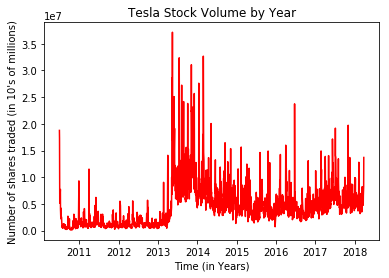

In [42]:
plt.plot(tesla.index, tesla['Volume'].astype(int), 'r')
plt.title('Tesla Stock Volume by Year')
plt.ylabel('Number of shares traded (in 10\'s of millions)');
plt.xlabel('Time (in Years)');
plt.show();

### Activity: using plt.plot, make 3 visualizations on time series. Based off of this, discuss with a neighboor any odd trends you see and try to explain them

### Slicing and time intervals
Viewing our data is all fine and dandy, but thats just wieing the entire set, what if we wanted to view this based on certain time intervals?

Most times series are indexed based on what time the event in question took place. This differs from the bulk of your other data sets in that their indexes are just the number in which they appear in the dataset, this can be completely arbitrary. Time series are sliced pythonic-ly based on the that of occurence.

Let's do some slicing just based on the year!

In [43]:
tesla['2010'].head(10)

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2010-06-29,19.0000,25.0000,17.54,23.89,18766300.0,0.0,1.0,19.0000,25.0000,17.54,23.89,18766300.0
2010-06-30,25.7900,30.4192,23.30,23.83,17187100.0,0.0,1.0,25.7900,30.4192,23.30,23.83,17187100.0
2010-07-01,25.0000,25.9200,20.27,21.96,8218800.0,0.0,1.0,25.0000,25.9200,20.27,21.96,8218800.0
2010-07-02,23.0000,23.1000,18.71,19.20,5139800.0,0.0,1.0,23.0000,23.1000,18.71,19.20,5139800.0
2010-07-06,20.0000,20.0000,15.83,16.11,6866900.0,0.0,1.0,20.0000,20.0000,15.83,16.11,6866900.0
2010-07-07,16.4000,16.6300,14.98,15.80,6921700.0,0.0,1.0,16.4000,16.6300,14.98,15.80,6921700.0
2010-07-08,16.1400,17.5200,15.57,17.46,7711400.0,0.0,1.0,16.1400,17.5200,15.57,17.46,7711400.0
2010-07-09,17.5800,17.9000,16.55,17.40,4050600.0,0.0,1.0,17.5800,17.9000,16.55,17.40,4050600.0
2010-07-12,17.9500,18.0700,17.00,17.05,2202500.0,0.0,1.0,17.9500,18.0700,17.00,17.05,2202500.0


### Let's query the data just based off what happened in January of 2011

In [24]:
tesla['2011-1'].head(10)

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2011-01-03,26.84,26.9999,25.90,26.62,1283000.0,0.0,1.0,26.84,26.9999,25.90,26.62,1283000.0
2011-01-04,26.66,26.9500,26.02,26.67,1187400.0,0.0,1.0,26.66,26.9500,26.02,26.67,1187400.0
2011-01-05,26.48,26.9000,26.19,26.83,1446700.0,0.0,1.0,26.48,26.9000,26.19,26.83,1446700.0
2011-01-06,26.83,28.0000,26.81,27.88,2061200.0,0.0,1.0,26.83,28.0000,26.81,27.88,2061200.0
2011-01-07,28.00,28.5800,27.90,28.24,2247900.0,0.0,1.0,28.00,28.5800,27.90,28.24,2247900.0
2011-01-10,28.17,28.6800,28.05,28.45,1342700.0,0.0,1.0,28.17,28.6800,28.05,28.45,1342700.0
2011-01-11,28.59,28.7100,26.92,26.96,1710200.0,0.0,1.0,28.59,28.7100,26.92,26.96,1710200.0
2011-01-12,27.01,27.3990,26.52,26.96,964400.0,0.0,1.0,27.01,27.3990,26.52,26.96,964400.0
2011-01-13,26.96,26.9700,26.16,26.22,723600.0,0.0,1.0,26.96,26.9700,26.16,26.22,723600.0


### More precise slicing

Most of your time series can be index in the following format.

> month/day/year


Let's slice our dataframe based on just thethe summer of 2015, shall we?

In [37]:
# Let's give summer a start date of May 1st
summer_start = '05/1/2015'

# Let's give it an end date of september 30th
summer_end = '09/30/2019'

# lets set it to another variable
tesla_summer = tesla[summer_start:summer_end]

In [38]:
tesla_summer.tail(10)

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,


## Data base example

Fintech is nice and all but we build products here!!! One of the ways that you'll be dealing with data in the industry and your own apps is your own user data. Knowing when, how many, or if your results indicate something odd is happening in your applications is a skill that makes things like testing, fraud detection, or even crashes and uptime.

The example we have below is a selection of user comments and button clicks observed in a fictional database over the last month of September.
The columns contain the unique usernames, emails, comments, creation dates for those comments, as well as the number of button clicks this account has per minute. Well be using this data set to answer a few questions using the skills we've gains in time series, as well basic data manipulation.

In [36]:
user_comments_df = pd.read_csv('user_comments.csv')
user_comments_df

,id,user_name,email,comment,date_created,btn_clicks_per_min
0,1,mcarass0,amingauld0@amazon.co.uk,molestie lorem quisque ut erat curabitur gravi...,2018-09-13 06:09:40,12
1,2,bhessenthaler1,fputtan1@imgur.com,felis sed lacus morbi sem mauris laoreet ut rh...,2018-09-07 08:17:22,25
2,3,rschaffler2,ojendrys2@home.pl,vestibulum ante ipsum primis in faucibus orci ...,2018-09-10 08:24:07,26
3,4,gbondy3,aspiniello3@wikimedia.org,ultrices posuere cubilia curae duis faucibus a...,2018-09-03 07:18:20,32
4,5,disaaksohn4,rburchall4@zimbio.com,magna ac consequat metus sapien ut nunc vestib...,2018-09-17 23:20:40,20
5,6,bewen5,bhune5@youtu.be,nulla suscipit ligula in lacus curabitur at ip...,2018-09-17 00:20:35,27
6,7,fcullnean6,scornier6@issuu.com,nulla ut erat id mauris vulputate elementum nu...,2018-09-26 13:06:01,25
7,8,fpayn7,wprose7@uiuc.edu,turpis nec euismod scelerisque quam turpis adi...,2018-09-28 02:19:05,7
8,9,gbernaldo8,mgotts8@addthis.com,in tempor turpis nec euismod scelerisque quam ...,2018-09-12 20:30:08,6
9,10,ahainge9,lrestall9@gizmodo.com,sed augue aliquam erat volutpat in congue etia...,2018-09-12 03:05:53,41


## Challenges

1. How many government accounts have made comments in the month this dataset covers?
2. What day had the most comments? which had the least?
3. We'll define a fradulent account as one that has made more than 40 average clicks per minute. how many fraud accounts are there in this dataset? How many are students in college? Do non goverment accounts have a higher probability of being fraud vs the probability of being fraudulent if they are non-goverment accounts?
4. How many comments mention 'gradiva' and were there more mentions during the day or night?
5. Was the latter half of the month more popular for commenting than the earlier half?
6. What is the average length of a comment coming from people in the irs?

In [45]:
# Here is an example of how to use the pandas.Series.str.contains() method to parse every string in a series and return the rows containing certain data. This will help you out with some of the exercises above

user_comments_df[(user_comments_df['user_name'].str.contains('this',regex=False))]

,id,user_name,email,comment,date_created,btn_clicks_per_min
660,661,amathissenic,tvardonic@comcast.net,quam sollicitudin vitae consectetuer eget rutr...,2018-09-25 02:46:38,20
